<a href="https://colab.research.google.com/github/GijsJackersPXL/Smart_systems_Eindoefening/blob/main/Vraag3/Vraag3_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maak een eigen dataset aan of gebruik een online dataset van een specifiek object. Bouw een AI model dat Anomalies kan detecteren (visueel; dus op foto's). Dit kan bijvoorbeeld gebruikt worden om defecteren in een object vast te stellen. Zorg ervoor dat dit model live gebruikt kan worden (gebruik je webcam,...)

In [2]:
import numpy as np
import cv2
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
from sklearn import svm
from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler

In [4]:
! git clone https://github.com/GijsJackersPXL/Smart_systems_Eindoefening.git

Cloning into 'Smart_systems_Eindoefening'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 269 (delta 7), reused 16 (delta 6), pack-reused 252
Receiving objects: 100% (269/269), 401.37 MiB | 20.73 MiB/s, done.
Resolving deltas: 100% (91/91), done.
Checking out files: 100% (175/175), done.


In [5]:
# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the data from the directory on Google Drive
data_dir = "/content/Smart_systems_Eindoefening/Vraag3/Foto's_objecten/Train"

In [6]:
# Use the flow_from_directory method to load the data
data_gen = datagen.flow_from_directory(data_dir,
                                      target_size=(224, 224),
                                      batch_size=10,
                                      class_mode='binary',
                                      shuffle=False)

# Get the number of classes
num_classes = len(data_gen.class_indices)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model on the training data
model.fit(data_gen)

Found 14 images belonging to 1 classes.
2/2 [==============================] - 11s 2s/step - loss: 0.5655 - accuracy: 0.0000e+00


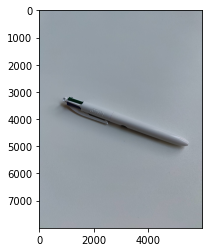

In [7]:
# Load the image
image_drive = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Pen/IMG20230103150508.jpg")
image_drive = cv2.cvtColor(image_drive, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_drive)
plt.show()

In [8]:
def preprocess_image(image, grayscale=False, data_augmentation=False):
  # Resize the image
  image = cv2.resize(image, (224, 224))

  # Convert the image to grayscale if needed
  if grayscale:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image = np.expand_dims(image, -1)

  # Normalize the pixel values
  image = image / 255.0

  # If data augmentation is enabled, randomly apply some transformations
  # if data_augmentation:
  #     image = random_transform(image)

  # Add an extra dimension to the image so that it has shape (1, height, width, channels)
  image = np.expand_dims(image, 0)

  return image

In [12]:
# Preprocess the image
image = preprocess_image(image_drive)

# Run the model and get the predictions
predictions = model.predict(image)

# Print
if predictions > 0.7:
  print("Het is een PSOC")
else:
  print("Het is geen PSOC")

1/1 [==============================] - 0s 27ms/step
Het is een PSOC


In [13]:
print(predictions)

[[1.]]
